In [48]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [130]:
df = pd.read_csv('/Users/mac/Desktop/Mine/Data Science/Purwadhika/Lesson/Modul3/Dataset/IMDB Dataset Sentiment - Sampling.csv')
df

,review,sentiment
0,I don't know how or why this film has a meager...,positive
1,For a long time it seemed like all the good Ca...,positive
2,Terry Gilliam's and David Peoples' teamed up t...,positive
3,What is there to say about an anti-establishme...,positive
4,This movie was made only 48 years after the en...,positive
...,...,...
9995,Very interesting to find another reviewer who ...,negative
9996,When I began watching The Muppets Take Manhatt...,negative
9997,i was disappointed in this documentary.i thoug...,negative
9998,"The acting wasn't great, the story was full of...",negative


In [50]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [51]:
# label
# 0: positive or neutral
# 1: negative

df['label'] = np.where(df['sentiment']=='negative', 1, 0)
df = df[['review', 'sentiment', 'label']]
df

,review,sentiment,label
0,I don't know how or why this film has a meager...,positive,0
1,For a long time it seemed like all the good Ca...,positive,0
2,Terry Gilliam's and David Peoples' teamed up t...,positive,0
3,What is there to say about an anti-establishme...,positive,0
4,This movie was made only 48 years after the en...,positive,0
...,...,...,...
9995,Very interesting to find another reviewer who ...,negative,1
9996,When I began watching The Muppets Take Manhatt...,negative,1
9997,i was disappointed in this documentary.i thoug...,negative,1
9998,"The acting wasn't great, the story was full of...",negative,1


In [52]:
df['label'].value_counts()

# 0: positive or neutral
# 1: negative

label
0    5000
1    5000
Name: count, dtype: int64

## Preprocessing 1

### 0. Hapus mention

In [53]:
# from bs4 import BeautifulSoup

# def remove_br_tags(text):
#     soup = BeautifulSoup(text, "html.parser")
#     cleaned_text = soup.get_text(separator=" ")
#     return cleaned_text

In [54]:
def remove_br_tags(text):
    cleaned_text = text.replace('<br />', '')
    return cleaned_text

### 1. Lowercase

In [55]:
def to_lower(text):
    return text.lower()

### 2. Remove contraction

In [56]:
contractions_dict = {    
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

def remove_contraction(text):

    list_kata = text.split()
    list_hasil = []

    for kata in list_kata:

        if kata in contractions_dict.keys():
            list_hasil.append(contractions_dict[kata])
        else:
            list_hasil.append(kata)

    hasil = ' '.join(list_hasil)
    return hasil 

### 3. Remove number

In [57]:
def remove_number(text):
    hasil = ''.join([char for char in text if not char.isnumeric()])
    return hasil

### 4. Remove punctuation

In [58]:
from string import punctuation

def remove_punctuation(text):
    hasil = ''.join([char for char in text if not char in punctuation])
    return hasil

### 5. Remove stopwords

In [59]:
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.remove('not')

def remove_stopwords(text):
    hasil = ' '.join([kata for kata in text.split() if kata not in stop_words])
    return hasil 

### 6. Remove whitespace

In [60]:
def remove_whitespace(text):
    hasil = ' '.join(text.split())
    return hasil

### Combine all steps

In [61]:
def combine_cleaning(your_series):

    df['prep0'] = your_series.apply(to_lower)
    df['prep1'] = df['prep0'].apply(remove_br_tags)
    df['prep2'] = df['prep1'].apply(remove_contraction)
    df['prep3'] = df['prep2'].apply(remove_number)
    df['prep4'] = df['prep3'].apply(remove_punctuation)
    df['prep5'] = df['prep4'].apply(remove_stopwords)
    df['prep6'] = df['prep5'].apply(remove_whitespace)

    return df

In [62]:
combine_cleaning(df['review'])

,review,sentiment,label,prep0,prep1,prep2,prep3,prep4,prep5,prep6
0,I don't know how or why this film has a meager...,positive,0,i don't know how or why this film has a meager...,i don't know how or why this film has a meager...,i do not know how or why this film has a meage...,i do not know how or why this film has a meage...,i do not know how or why this film has a meage...,not know film meager rating imdb film accompan...,not know film meager rating imdb film accompan...
1,For a long time it seemed like all the good Ca...,positive,0,for a long time it seemed like all the good ca...,for a long time it seemed like all the good ca...,for a long time it seemed like all the good ca...,for a long time it seemed like all the good ca...,for a long time it seemed like all the good ca...,long time seemed like good canadian actors hea...,long time seemed like good canadian actors hea...
2,Terry Gilliam's and David Peoples' teamed up t...,positive,0,terry gilliam's and david peoples' teamed up t...,terry gilliam's and david peoples' teamed up t...,terry gilliam's and david peoples' teamed up t...,terry gilliam's and david peoples' teamed up t...,terry gilliams and david peoples teamed up to ...,terry gilliams david peoples teamed create one...,terry gilliams david peoples teamed create one...
3,What is there to say about an anti-establishme...,positive,0,what is there to say about an anti-establishme...,what is there to say about an anti-establishme...,what is there to say about an anti-establishme...,what is there to say about an anti-establishme...,what is there to say about an antiestablishmen...,say antiestablishment film produced time colou...,say antiestablishment film produced time colou...
4,This movie was made only 48 years after the en...,positive,0,this movie was made only 48 years after the en...,this movie was made only 48 years after the en...,this movie was made only 48 years after the en...,this movie was made only years after the end ...,this movie was made only years after the end ...,movie made years end civil warmost likely anti...,movie made years end civil warmost likely anti...
...,...,...,...,...,...,...,...,...,...,...
9995,Very interesting to find another reviewer who ...,negative,1,very interesting to find another reviewer who ...,very interesting to find another reviewer who ...,very interesting to find another reviewer who ...,very interesting to find another reviewer who ...,very interesting to find another reviewer who ...,interesting find another reviewer exact reacti...,interesting find another reviewer exact reacti...
9996,When I began watching The Muppets Take Manhatt...,negative,1,when i began watching the muppets take manhatt...,when i began watching the muppets take manhatt...,when i began watching the muppets take manhatt...,when i began watching the muppets take manhatt...,when i began watching the muppets take manhatt...,began watching muppets take manhattan choppy p...,began watching muppets take manhattan choppy p...
9997,i was disappointed in this documentary.i thoug...,negative,1,i was disappointed in this documentary.i thoug...,i was disappointed in this documentary.i thoug...,i was disappointed in this documentary.i thoug...,i was disappointed in this documentary.i thoug...,i was disappointed in this documentaryi though...,disappointed documentaryi thought would second...,disappointed documentaryi thought would second...
9998,"The acting wasn't great, the story was full of...",negative,1,"the acting wasn't great, the story was full of...","the acting wasn't great, the story was full of...","the acting was not great, the story was full o...","the acting was not great, the story was full o...",the acting was not great the story was full of...,acting not great story full simplistic turns t...,acting not great story full simplistic turns t...


## Preprocessing 2

In [63]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer 

### Stemmer

In [64]:
stemmer = SnowballStemmer('english')

def stem(text):

    list_hasil = []

    for sentence in nltk.sent_tokenize(text):   # pecah paragraf menjadi kalimat-kalimat
        for word in nltk.word_tokenize(sentence): # pecah kalimat menjadi kata-kata
            list_hasil.append(stemmer.stem(word))   # ubah kata ke kata dasarnya

    hasil = ' '.join(list_hasil)
    return hasil 

### Lemmatization

In [65]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):

    list_hasil = []

    for sentence in nltk.sent_tokenize(text):   # pecah paragraf menjadi kalimat-kalimat
        for word in nltk.word_tokenize(sentence): # pecah kalimat menjadi kata-kata
            list_hasil.append(lemmatizer.lemmatize(word))   # ubah kata ke kata dasarnya

    hasil = ' '.join(list_hasil)
    return hasil 

### Combine Preproc 1 & 2

In [66]:
df['stem'] = df['prep6'].apply(stem)
df['lemm'] = df['prep6'].apply(lemmatize)

df.head()

,review,sentiment,label,prep0,prep1,prep2,prep3,prep4,prep5,prep6,stem,lemm
0,I don't know how or why this film has a meager...,positive,0,i don't know how or why this film has a meager...,i don't know how or why this film has a meager...,i do not know how or why this film has a meage...,i do not know how or why this film has a meage...,i do not know how or why this film has a meage...,not know film meager rating imdb film accompan...,not know film meager rating imdb film accompan...,not know film meager rate imdb film accompani ...,not know film meager rating imdb film accompan...
1,For a long time it seemed like all the good Ca...,positive,0,for a long time it seemed like all the good ca...,for a long time it seemed like all the good ca...,for a long time it seemed like all the good ca...,for a long time it seemed like all the good ca...,for a long time it seemed like all the good ca...,long time seemed like good canadian actors hea...,long time seemed like good canadian actors hea...,long time seem like good canadian actor head s...,long time seemed like good canadian actor head...
2,Terry Gilliam's and David Peoples' teamed up t...,positive,0,terry gilliam's and david peoples' teamed up t...,terry gilliam's and david peoples' teamed up t...,terry gilliam's and david peoples' teamed up t...,terry gilliam's and david peoples' teamed up t...,terry gilliams and david peoples teamed up to ...,terry gilliams david peoples teamed create one...,terry gilliams david peoples teamed create one...,terri gilliam david peopl team creat one intel...,terry gilliams david people teamed create one ...
3,What is there to say about an anti-establishme...,positive,0,what is there to say about an anti-establishme...,what is there to say about an anti-establishme...,what is there to say about an anti-establishme...,what is there to say about an anti-establishme...,what is there to say about an antiestablishmen...,say antiestablishment film produced time colou...,say antiestablishment film produced time colou...,say antiestablish film produc time colourless ...,say antiestablishment film produced time colou...
4,This movie was made only 48 years after the en...,positive,0,this movie was made only 48 years after the en...,this movie was made only 48 years after the en...,this movie was made only 48 years after the en...,this movie was made only years after the end ...,this movie was made only years after the end ...,movie made years end civil warmost likely anti...,movie made years end civil warmost likely anti...,movi made year end civil warmost like anticip ...,movie made year end civil warmost likely antic...


## EDA Text Frequency

In [96]:
df['lemm']


0       not know film meager rating imdb film accompan...
1       long time seemed like good canadian actor head...
2       terry gilliams david people teamed create one ...
3       say antiestablishment film produced time colou...
4       movie made year end civil warmost likely antic...
                              ...                        
9995    interesting find another reviewer exact reacti...
9996    began watching muppets take manhattan choppy p...
9997    disappointed documentaryi thought would second...
9998    acting not great story full simplistic turn tr...
9999    two kind musical first glossy mgm production b...
Name: lemm, Length: 10000, dtype: object

In [97]:
text = df['lemm']

df_text = text.str.extractall('(\w+)') # ambil tiap kata dari tiap document
df_text = df_text.reset_index()

df_unique = df_text[0].value_counts()
df_unique = df_unique.to_frame().reset_index().rename(columns={'index':'word', 0:'freq'})

df_unique

,freq,count
0,not,24932
1,movie,19730
2,film,18188
3,one,10699
4,like,7881
...,...,...
74063,stupidified,1
74064,milking,1
74065,camachos,1
74066,normalmitthi,1


In [98]:
def word_freq(text):

    df_text = text.str.extractall('(\w+)') # ambil tiap kata dari tiap document
    df_text = df_text.reset_index()

    df_unique = df_text[0].value_counts()
    df_unique = df_unique.to_frame().reset_index().rename(columns={'word':'cout', 0:'freq'})

    return df_unique

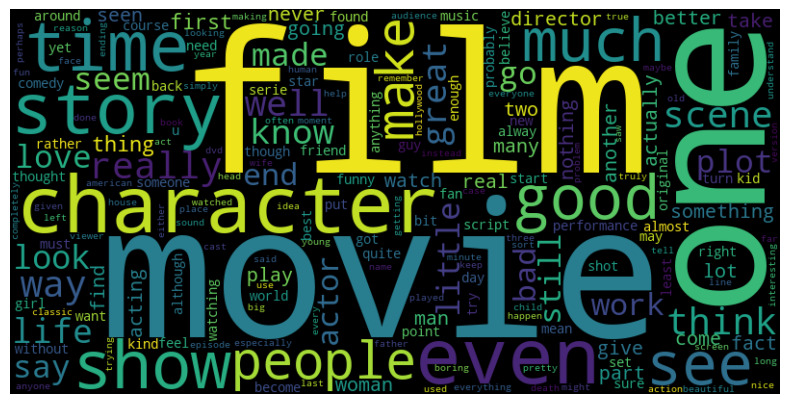

In [99]:
from wordcloud import WordCloud

# Assuming df['lemmatize'] is a string containing your text data
text_wc = " ".join(df['lemm'])  # Join the lemmatized text data into a single string

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, contour_color= 'black',background_color='black').generate(text_wc)

# Create a matplotlib figure
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis

# Display the word cloud
plt.tight_layout()
plt.show()

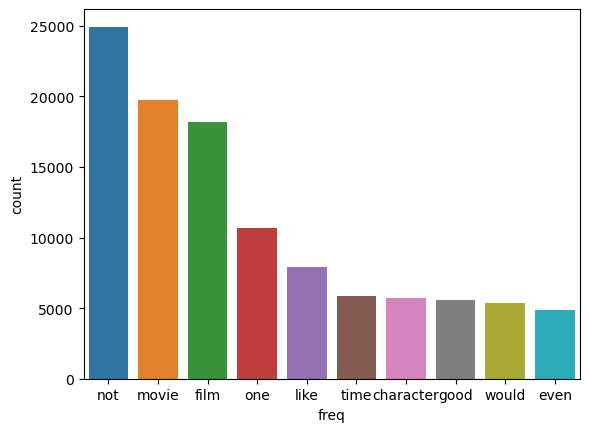

In [100]:
# Top 10 most frequent words
data = word_freq(df['lemm'])
sns.barplot(data=data.head(10), x='freq', y='count');

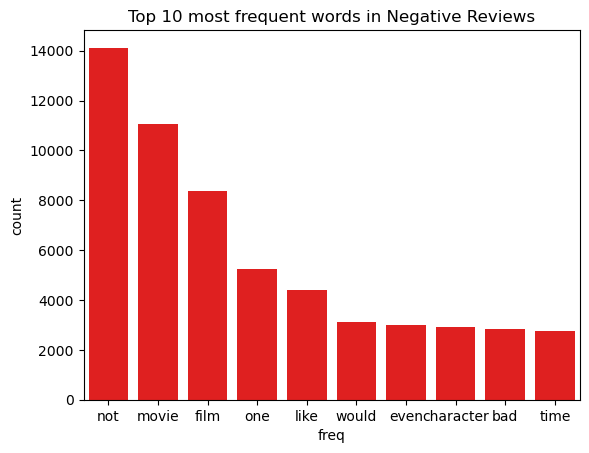

In [101]:
# Top 10 most frequent words in Negative Tweets
data = word_freq(df[df['label']==1]['lemm'])
sns.barplot(data=data.head(10), x='freq', y='count', color='red')
plt.title('Top 10 most frequent words in Negative Reviews'); 

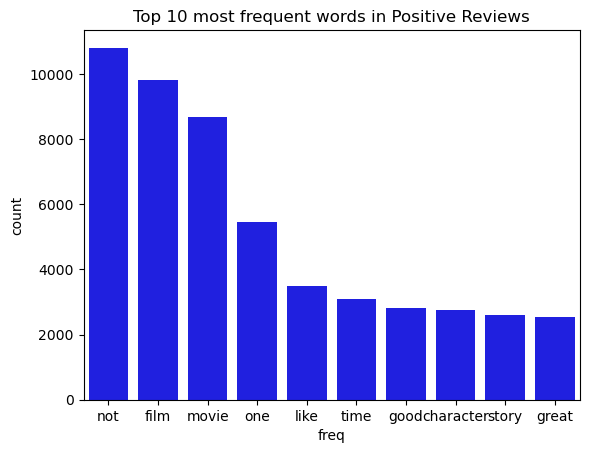

In [102]:
# Top 10 most frequent words in Positive Tweets
data = word_freq(df[df['label']==0]['lemm'])
sns.barplot(data=data.head(10), x='freq', y='count', color='blue')
plt.title('Top 10 most frequent words in Positive Reviews'); 

## Length of Documents

In [103]:
df['len_char'] = df['lemm'].str.len()
df.head()

,review,sentiment,label,prep0,prep1,prep2,prep3,prep4,prep5,prep6,stem,lemm,len_char
0,I don't know how or why this film has a meager...,positive,0,i don't know how or why this film has a meager...,i don't know how or why this film has a meager...,i do not know how or why this film has a meage...,i do not know how or why this film has a meage...,i do not know how or why this film has a meage...,not know film meager rating imdb film accompan...,not know film meager rating imdb film accompan...,not know film meager rate imdb film accompani ...,not know film meager rating imdb film accompan...,1392
1,For a long time it seemed like all the good Ca...,positive,0,for a long time it seemed like all the good ca...,for a long time it seemed like all the good ca...,for a long time it seemed like all the good ca...,for a long time it seemed like all the good ca...,for a long time it seemed like all the good ca...,long time seemed like good canadian actors hea...,long time seemed like good canadian actors hea...,long time seem like good canadian actor head s...,long time seemed like good canadian actor head...,446
2,Terry Gilliam's and David Peoples' teamed up t...,positive,0,terry gilliam's and david peoples' teamed up t...,terry gilliam's and david peoples' teamed up t...,terry gilliam's and david peoples' teamed up t...,terry gilliam's and david peoples' teamed up t...,terry gilliams and david peoples teamed up to ...,terry gilliams david peoples teamed create one...,terry gilliams david peoples teamed create one...,terri gilliam david peopl team creat one intel...,terry gilliams david people teamed create one ...,3588
3,What is there to say about an anti-establishme...,positive,0,what is there to say about an anti-establishme...,what is there to say about an anti-establishme...,what is there to say about an anti-establishme...,what is there to say about an anti-establishme...,what is there to say about an antiestablishmen...,say antiestablishment film produced time colou...,say antiestablishment film produced time colou...,say antiestablish film produc time colourless ...,say antiestablishment film produced time colou...,1054
4,This movie was made only 48 years after the en...,positive,0,this movie was made only 48 years after the en...,this movie was made only 48 years after the en...,this movie was made only 48 years after the en...,this movie was made only years after the end ...,this movie was made only years after the end ...,movie made years end civil warmost likely anti...,movie made years end civil warmost likely anti...,movi made year end civil warmost like anticip ...,movie made year end civil warmost likely antic...,613


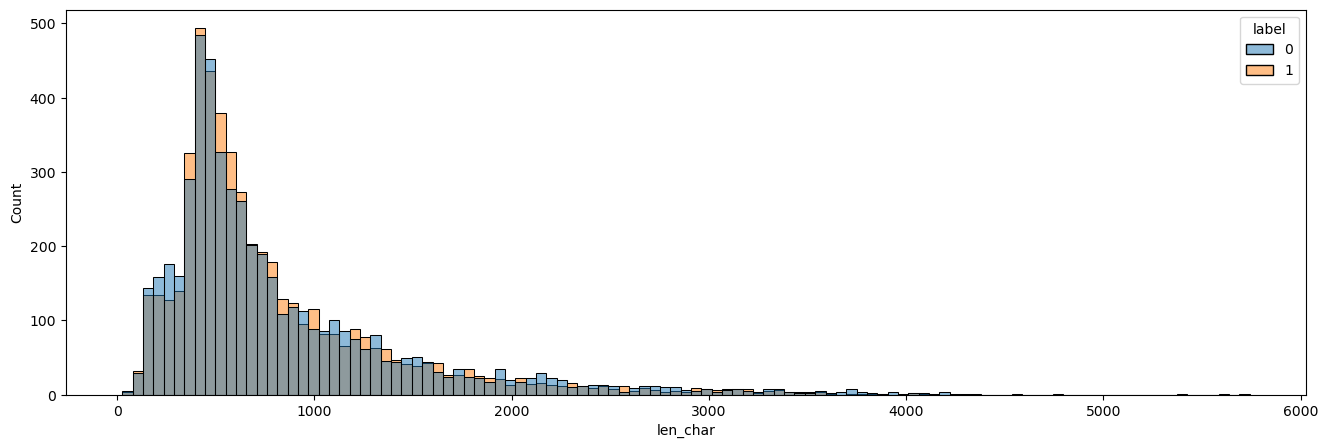

In [104]:
plt.figure(figsize=(16,5))
sns.histplot(data=df, x='len_char', hue='label');

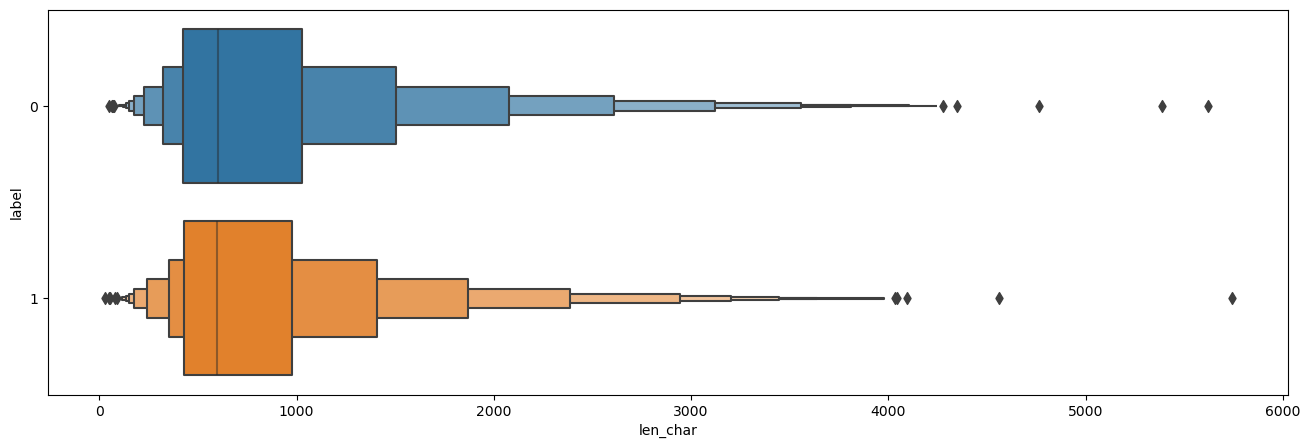

In [105]:
df['label'] = df['label'].astype(str)

plt.figure(figsize=(16,5))
sns.boxenplot(data=df, x='len_char', y='label');

In [106]:
df['label'] = df['label'].astype(int)


## Classification

In [107]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [108]:
df_clean = df[['lemm', 'sentiment', 'label']]
df_clean.head()

,lemm,sentiment,label
0,not know film meager rating imdb film accompan...,positive,0
1,long time seemed like good canadian actor head...,positive,0
2,terry gilliams david people teamed create one ...,positive,0
3,say antiestablishment film produced time colou...,positive,0
4,movie made year end civil warmost likely antic...,positive,0


### Define text and y

In [109]:
text = df_clean['lemm']
y = df_clean['label']

In [110]:
y.value_counts() / len(y)


label
0    0.5
1    0.5
Name: count, dtype: float64

### Data Splitting

In [111]:
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=0.25, stratify=y, random_state=42)

In [112]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

logreg = LogisticRegression(random_state=42)
xgb = XGBClassifier(random_state = 42)
rf = RandomForestClassifier(random_state=42)

vectorizer = TfidfVectorizer(norm=None)

list_model = [logreg, rf, xgb]

fit_time_arr = []
score_time_arr = []     
test_accuracy_arr = []    
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []

metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

for i in list_model:
    crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('vectorizer', vectorizer),
        ('model', i),
    ])

    scores = cross_validate(estimator, text_train, y_train,cv=crossval, scoring=metrics)
    fit_time_arr.append(scores['fit_time'].mean())
    score_time_arr.append(scores['score_time'].mean())
    test_accuracy_arr.append(scores['test_balanced_accuracy'].mean())
    test_precision_arr.append(scores['test_precision'].mean())
    test_recall_arr.append(scores['test_recall'].mean())
    test_f1_arr.append(scores['test_f1'].mean())

model_bench = pd.DataFrame({
    'model': ['logreg', 'rf', 'xgboost'],
    'fit_time': fit_time_arr,
    'score_time': score_time_arr,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f1': test_f1_arr,
})

model_bench

,model,fit_time,score_time,accuracy,precision,recall,f1
0,logreg,2.312977,0.202347,0.861733,0.867165,0.854400,0.860635
1,rf,22.088980,0.406647,0.837867,0.850472,0.820000,0.834836
2,xgboost,7.166354,0.331842,0.834267,0.846551,0.817067,0.831304


## Hyperparameter Tuning

In [113]:
vectorizer1 = CountVectorizer(ngram_range=(1,1))
vectorizer2 = TfidfVectorizer(norm=None)

In [114]:
# hyperparam space Decision Tree
logreg = LogisticRegression(random_state = 42)


hyperparam_space = {
    'model__C': [5.0],
    'model__penalty': ['l2'],
    'model__solver': ['saga'],
    'vectorizer': [vectorizer1, vectorizer2],
    'vectorizer__ngram_range': [(1,1), (1,2)],
}

# pipeline
model_pipe = Pipeline([ 
    ('vectorizer', vectorizer1),
    ('model', logreg)
])

# randomized search
random_search = RandomizedSearchCV(
    estimator= model_pipe,
    param_distributions= hyperparam_space,
    scoring='precision',
    cv=3,
    random_state=42,
    n_jobs=-1,
    n_iter= 10
)

In [115]:
random_search.fit(text_train, y_train)


/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                             ('model',
                                              LogisticRegression(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__C': [5.0],
                                        'model__penalty': ['l2'],
                                        'model__solver': ['saga'],
                                        'vectorizer': [CountVectorizer(),
                                                       TfidfVectorizer(ngram_range=(1,
                                                                                    2),
                                                                       norm=None)],
                                        'vectorizer__ngram_range': [(1, 1),
                                                                    (1, 2)]},
                   random_state=42, scoring='precision')

In [116]:
random_search.best_params_


{'vectorizer__ngram_range': (1, 2),
 'vectorizer': TfidfVectorizer(ngram_range=(1, 2), norm=None),
 'model__solver': 'saga',
 'model__penalty': 'l2',
 'model__C': 5.0}

In [117]:
random_search.best_score_


0.8894497092952824

## Predict to Test

In [118]:
from sklearn.metrics import precision_score

logreg = LogisticRegression(random_state = 42)
vectorizer = TfidfVectorizer(norm=None)

# pipeline
model_pipe = Pipeline([ 
    ('vectorizer', vectorizer),
    ('model', logreg)
])

model_pipe.fit(text_train, y_train)
y_pred_before = model_pipe.predict(text_test)
precision_score(y_test, y_pred_before)

0.8679245283018868

### After Tuning

In [119]:
random_search.best_estimator_


Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2), norm=None)),
                ('model',
                 LogisticRegression(C=5.0, random_state=42, solver='saga'))])

In [120]:
best_model = random_search.best_estimator_
best_model.fit(text_train, y_train)
y_pred_after = best_model.predict(text_test)


precision_score(y_test, y_pred_after)

0.8898163606010017

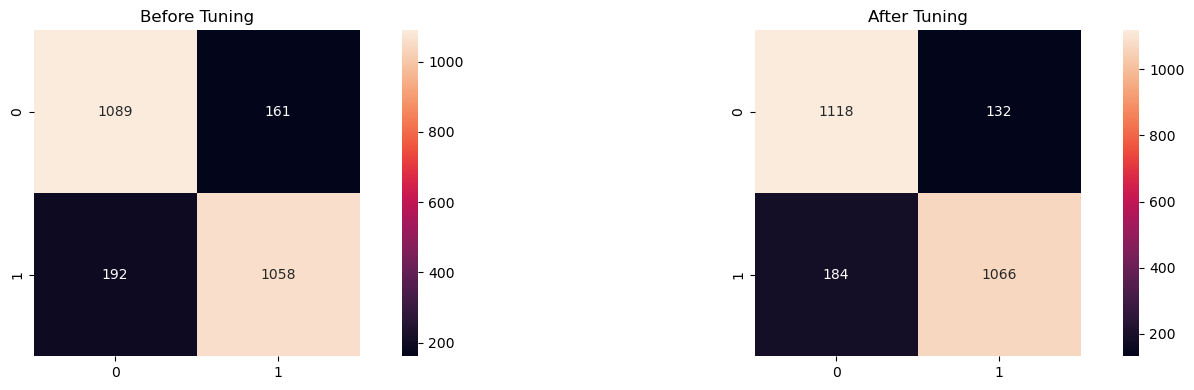

In [121]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f', square=True)
plt.title('Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f', square=True)
plt.title('After Tuning')
plt.tight_layout();


In [122]:
# Performa model meningkat setelah dilakukan hyperpameter tuning

print(precision_score(y_test, y_pred_before), 'Before hyperpameter tuning')
print(precision_score(y_test, y_pred_after), 'After hyperpameter tuning')

0.8679245283018868 Before hyperpameter tuning
0.8898163606010017 After hyperpameter tuning


In [125]:
logreg = LogisticRegression(random_state = 42)
vectorizer = TfidfVectorizer(norm=None)

# pipeline
model_pipe = Pipeline([ 
    ('vectorizer', vectorizer),
    ('model', logreg)
])

model_pipe.fit(text_train, y_train)
model_pipe

Pipeline(steps=[('vectorizer', TfidfVectorizer(norm=None)),
                ('model', LogisticRegression(random_state=42))])

In [126]:
import pickle

pickle.dump(model_pipe, open('model.sav', 'wb'))